Text(0, 0.5, 'Frequency')

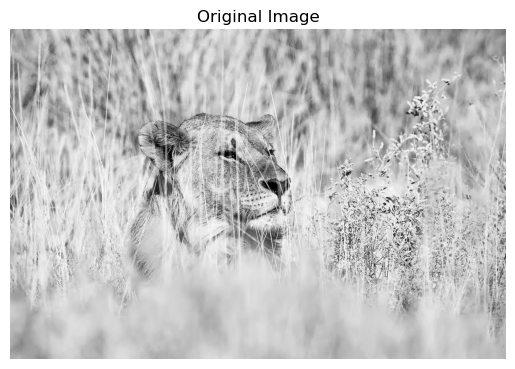

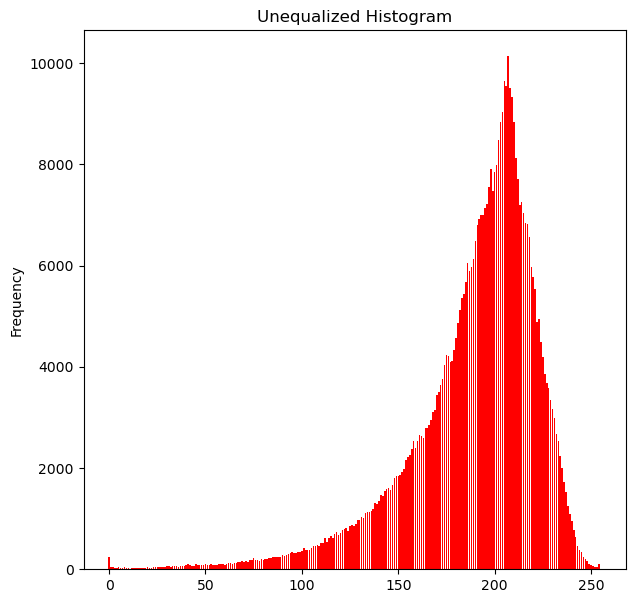

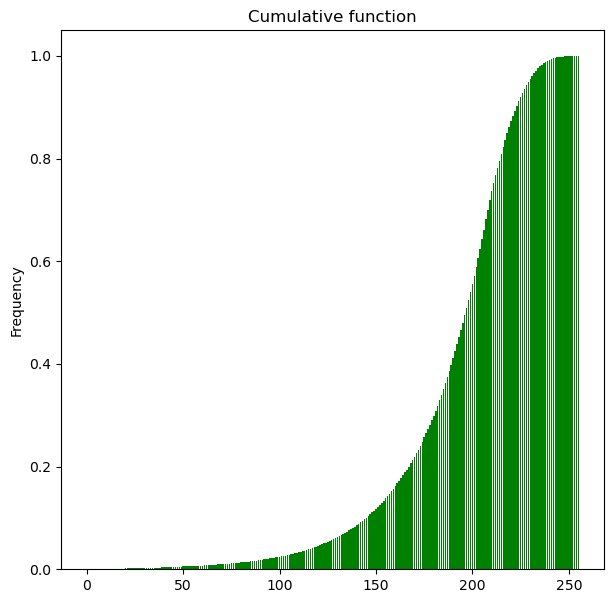

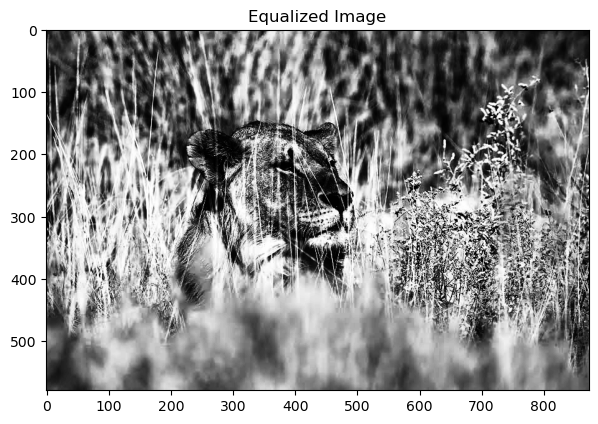

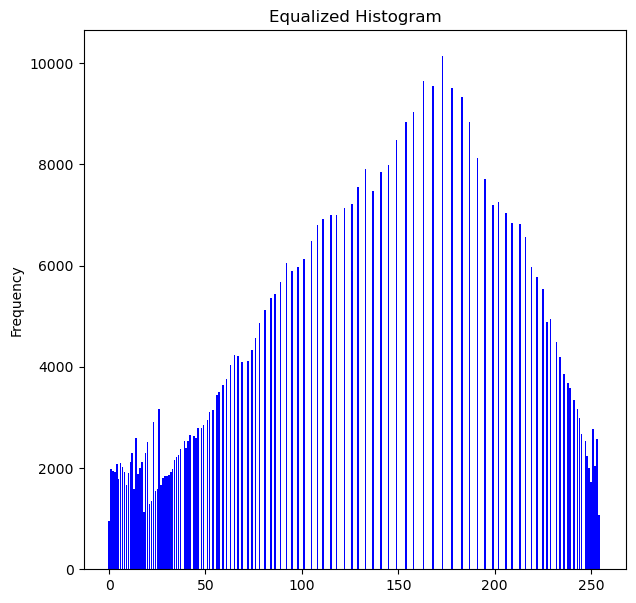

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, sys

image = cv2.imread('Pic6.jpg')
gray_img = (0.1140*image[:,:,0] + 0.5870*image[:,:,1]+ 0.2989*image[:,:,2]).astype(np.uint8)
w, h = gray_img.shape
plt.axis("off")
plt.imshow(gray_img, 'gray')
plt.title('Original Image')

hist_f = np.zeros(256) # Creat 1D array of zeros
for i in range(w):
    for j in range(h):
        '''
        Now at each index of the image u'll get a pixel intensity value (p), now
        at p_th index of empty 1D array you just add 1 and loop over whole image. 
        '''
        hist_f[(gray_img[i,j])] = hist_f[(gray_img[i,j])] + 1  
'''
1st one are the x-axis coordinated of the bars in histogram list respectively,
i.e. the value at the nth index of hist_f will be on the n coordinate on x=axis.
2nd is the hight of each bar.
'''
plt.figure(figsize=(7, 7))
plt.bar(list(range(len(hist_f))), hist_f, color='red') 
plt.title('Unequalized Histogram')
plt.ylabel('Frequency')

r_k = np.unique(gray_img)
p_k = hist_f
prob_m = p_k / np.sum(p_k)
C_m = np.zeros(len(p_k))
for i in range(len(p_k)):
    C_m[i] = prob_m[i] + C_m[i-1]
    
plt.figure(figsize=(7, 7))
plt.bar(list(range(len(C_m))), C_m, color='green') 
plt.title('Cumulative function')
plt.ylabel('Frequency')

L = C_m * np.max(gray_img)
L_r = np.round(L, 0)

eq_img = np.zeros((w, h), np.uint8)
for i in range(w):
    for j in range(h):
        '''
        This is just like the above done hist_f loop
        '''
        eq_img[i, j] = L_r[gray_img[i, j]]
        
plt.figure(figsize=(7, 7))
plt.imshow(eq_img, 'gray')
plt.title('Equalized Image')

eq_hist = np.zeros(256)
for i in range(w):
    for j in range(h):
        eq_hist[(eq_img[i,j])] = eq_hist[(eq_img[i,j])] + 1
        
plt.figure(figsize=(7, 7))
plt.bar(list(range(len(eq_hist))), eq_hist, color='blue') 
plt.title('Equalized Histogram')
plt.ylabel('Frequency')

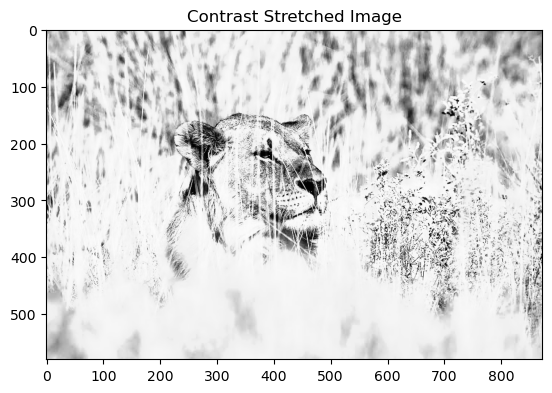

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img =  cv2.imread('Pic6.jpg')

# The values of xp and fp can be varied to create custom tables as required 
# and it will stretch the contrast even if min and max pixels are 0 and 255 

xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]

x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')

# cv2.LUT will replace the values of the original image with the values in the
# table. For example, all the pixels having values 1 will be replaced by 0 and 
# all pixels having values 4 will be replaced by 1.
img = cv2.LUT(img, table)

plt.imshow(img)
plt.title('Contrast Stretched Image')

# from shujaat
def contrast_stretching(z, a, b, z1, zk):

    new_array = np.copy(z)
        
    for i,value in enumerate(z):
        if value>=a and value<=b:
            new_pixel_value = (((zk - z1)/(b-a))*value) + ((z1*b - zk*a)/(b-a))

            new_array[i] = new_pixel_value

    return new_array